In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
import json
import pandas as pd
import glob
from PIL import Image
from marketplace_assistant.config import RAW_LISTINGS_DIR, RAW_IMAGE_METADATA_DIR, RAW_IMAGE_FILE_DIR, PROCESSED_DATA_DIR

In [3]:
dfs = []

json_pattern = os.path.join(RAW_LISTINGS_DIR,'*.json')
file_list = glob.glob(json_pattern)
for file in file_list:
    data = pd.read_json(file, lines=True)
    dfs.append(data)

listings = pd.concat(dfs, ignore_index=True)
listings.sample(5)

,brand,bullet_point,color,item_id,item_name,item_weight,model_name,model_number,product_type,main_image_id,...,item_dimensions,fabric_type,product_description,color_code,finish_type,item_shape,pattern,spin_id,model_year,3dmodel_id
99223,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...","[{'language_tag': 'fr_FR', 'value': 'Clavier r...",NaN,B0833CBLSV,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...",NaN,NaN,NaN,[{'value': 'INSTRUMENT_PARTS_AND_ACCESSORIES'}],71sRm77sDQL,...,{'height': {'normalized_value': {'unit': 'inch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67496,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...","[{'language_tag': 'fr_FR', 'value': 'Ce filtre...",NaN,B07PRBQCM1,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...",NaN,NaN,[{'value': 'PFS440GH-173W9'}],[{'value': 'OFFICE_ELECTRONICS'}],71Irz3coslL,...,{'height': {'normalized_value': {'unit': 'inch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75444,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': '3D Printe...","[{'language_tag': 'en_IN', 'standardized_value...",B07TG4S7M6,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Vivo Y31'}]",[{'value': 'gz8207-SL40593'}],[{'value': 'CELLULAR_PHONE_CASE'}],81ntTqHQbHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81134,"[{'language_tag': 'en_US', 'value': 'Whole Foo...","[{'language_tag': 'en_US', 'value': 'Supports ...",NaN,B074H6F6HF,"[{'language_tag': 'en_US', 'value': 'Whole Foo...",NaN,NaN,NaN,[{'value': 'VITAMIN'}],91jDMBFvJWL,...,{'height': {'normalized_value': {'unit': 'inch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87533,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",B08569D176,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'normalized_value': {'unit': 'pounds', 'valu...","[{'language_tag': 'en_IN', 'value': 'Vivo V7 P...",[{'value': 'UV10142-SL40478'}],[{'value': 'CELLULAR_PHONE_CASE'}],7153Y7P5RQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147702 entries, 0 to 147701
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   brand                147643 non-null  object
 1   bullet_point         131570 non-null  object
 2   color                116180 non-null  object
 3   item_id              147702 non-null  object
 4   item_name            147702 non-null  object
 5   item_weight          106194 non-null  object
 6   model_name           81579 non-null   object
 7   model_number         124091 non-null  object
 8   product_type         147702 non-null  object
 9   main_image_id        147127 non-null  object
 10  other_image_id       137976 non-null  object
 11  item_keywords        126776 non-null  object
 12  country              147702 non-null  object
 13  marketplace          147702 non-null  object
 14  domain_name          147702 non-null  object
 15  node                 140749 non-nu

# Relevant Columns
Want to keep a subset of columns that will be used to create the document for each item. 

0. brand
1. bullet_point
2. item_id
3. item_name
4. product_type
5. main_image_id
6. other_image_id

In [5]:
listings_informational_data = listings[["brand", "bullet_point", "item_id", "item_name", "product_type", "main_image_id", "other_image_id"]]
listings_informational_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147702 entries, 0 to 147701
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   brand           147643 non-null  object
 1   bullet_point    131570 non-null  object
 2   item_id         147702 non-null  object
 3   item_name       147702 non-null  object
 4   product_type    147702 non-null  object
 5   main_image_id   147127 non-null  object
 6   other_image_id  137976 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


In [6]:
listings_informational_data.sample(5)

,brand,bullet_point,item_id,item_name,product_type,main_image_id,other_image_id
20583,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...",B0853XF5SG,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",[{'value': 'CELLULAR_PHONE_CASE'}],71fzZluYOLL,"[51wiRu6gT9L, 51DEYNWtfsL, 518RypAtk8L, 71lnQt..."
57104,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...",B0854BHF5Z,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",[{'value': 'CELLULAR_PHONE_CASE'}],71gMeTptGuL,"[61+woWTqkwL, 61SE4RTPjdL]"
134614,"[{'language_tag': 'en_US', 'value': 'Solimo'}]","[{'language_tag': 'en_US', 'value': 'One 24-oz...",B07NJQWY8W,"[{'language_tag': 'en_US', 'value': 'Amazon Br...",[{'value': 'SAUCE'}],71y8ELA2ObL,"[415uE1Rh8WL, 71ctXgwVKzL, 61tr5jo4LuL, 51M39M..."
82446,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...",B0853XHFP1,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",[{'value': 'CELLULAR_PHONE_CASE'}],71RCD2p08aL,"[61+woWTqkwL, 61SE4RTPjdL]"
98464,"[{'language_tag': 'en_US', 'value': 'AmazonBas...","[{'language_tag': 'en_US', 'value': 'Shop stoo...",B07R1PVS26,"[{'language_tag': 'en_US', 'value': 'AmazonBas...",[{'value': 'AUTO_ACCESSORY'}],710CtOm6flL,"[81bMUbDbQhL, 816Z++FB8+L, 71vyIoIFeJL, 81Fvtq..."


# Extract Values
Cells are currently lists of dictionaries so we just want to keep the actual value

In [7]:
def extract_values(cell):
    if isinstance(cell, list) and len(cell) > 0 and isinstance(cell[0], dict):
        return '; '.join([item['value'] for item in cell])
    return cell
    
for colname, coldata in listings_informational_data.items():
    listings_informational_data[colname] = listings_informational_data[colname].apply(extract_values)

listings_informational_data.sample(5)

/var/folders/qj/6pzqw2hj4zj637bs709ky8240000gn/T/ipykernel_85166/2399251387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_informational_data[colname] = listings_informational_data[colname].apply(extract_values)


,brand,bullet_point,item_id,item_name,product_type,main_image_id,other_image_id
4133,Movian,"Dimensioni: 103,5 x 81,5 x 41,7 cm; Design mod...",B07H8JWNQH,"Marchio Amazon - Movian, cassettiera modello S...",CABINET,81K1tlh6oXL,"[51s2kw4ZvfL, 61fUwjjjwPL, 51nDu8vvXJL, 5126bh..."
31598,Amazon Kitchen,"Tofu with zucchini, baby corn, and water chest...",B0814H7Y5B,"Amazon Kitchen, Red Curry Tofu, No-Prep Kit fo...",GROCERY,71nlasKs6hL,"[81jVW1buDCL, 51Ot5R4kAXL, 718HtjYysEL, 711m75..."
44470,UMI,PACCHETTO -100% poliestere. Contiene 2 pannell...,B07HT7FFKS,UMI by Amazon Tende Oscuranti Termiche Isolant...,HOME,61ULr411DOL,"[81n5YUIHE5L, 71XdmHNXYtL, 81DwZuLDzbL, 81oQUC..."
14214,Amazon Brand - Solimo,"Snug fit for Mobile, with perfect cut-outs for...",B081HNCCDS,Amazon Brand - Solimo Designer Button Jeans Al...,CELLULAR_PHONE_CASE,71kavgR6BVL,"[51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL]"
36435,Amazon Brand - Solimo,"Snug fit for I Kall K5, with perfect cut-outs ...",B08547YRPR,Amazon Brand - Solimo Designer Purple Flowers ...,CELLULAR_PHONE_CASE,71S7wU+DK3L,"[61+woWTqkwL, 61SE4RTPjdL]"


# Add Image Paths to DF for easier access

In [8]:
image_paths = pd.read_csv(RAW_IMAGE_METADATA_DIR / "images.csv")
image_paths

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg
...,...,...,...,...
398207,B1zv8OpTkBS,2560,2560,6d/6d49d130.jpg
398208,B1zwflWhPIS,2560,2560,b1/b163e0ea.jpg
398209,C1lf45DhhRS,2560,2560,a1/a116d9d1.jpg
398210,C1pEt6jBLiS,2560,2560,9c/9c3e1158.jpg


In [10]:
listings_and_images = listings_informational_data.merge(image_paths, left_on="main_image_id", right_on="image_id", how="left")
listings_and_images = listings_and_images[["brand", "bullet_point", "item_id", "item_name", "product_type", "main_image_id", "other_image_id", "path"]]
listings_and_images.sample(5)

,brand,bullet_point,item_id,item_name,product_type,main_image_id,other_image_id,path
94211,Amazon Brand - Solimo,3D Printed Hard Back Case Mobile Cover for LG ...,B07TF1D79P,Amazon Brand - Solimo Designer Water Drop 3D P...,CELLULAR_PHONE_CASE,81HMxMNQr0L,"[61oI69Yt4GL, 61Xce1Hq7DL, 61ATVyzpLKL, 81vtpY...",af/af450c17.jpg
76475,Thirty Five Kent,Una marca de Amazon.,B013R3PJFC,Thirty Five Kent - Gorro Reversible para Hombr...,HAT,91fFLy8FspL,[91x4hvLYTIL],6c/6cf30480.jpg
66362,Amazon Brand - Solimo,3D Printed Hard Back Case Mobile Cover for Gio...,B07TH374LJ,Amazon Brand - Solimo Designer Yellow and Gree...,CELLULAR_PHONE_CASE,71Q5nLSKkAL,"[61oI69Yt4GL, 61Xce1Hq7DL, 61ATVyzpLKL, 81cYy9...",4b/4bb39ccd.jpg
10459,Rivet,Añade un toque clásico a tus paredes con esta ...,B07WT14T2Z,Remache rústico Redondo de Madera de 2 Niveles...,SHELF,71pTRAwnWbL,[81pvsFbgI0L],0a/0a5e441c.jpg
58133,find.,NaN,B0812CGVWN,"find. Women's Moccasin, Pink Pink, 6 us",SHOES,71Do7hEm6FL,"[81ekkvIE9lL, 71m4i9O-oRL, 81OZOXaFmQL, 91sJgr...",d5/d5ccd035.jpg


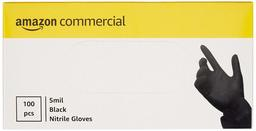

Single-use, disposable rubber nitrile gloves; Ideal for use in food service, industrial environments, cleaning/housekeeping, and more; Fully textured palm and fingers for exceptional gripping power, even in wet conditions; Flexible, comfortable, and powder-free; Resists abrasions and punctures


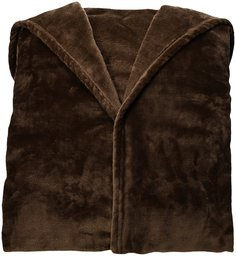

Microvezel fleecedeken voor voldoende warmte en comfort in de winter en het hele jaar door – praktisch en gebruiksvriendelijk.; De twee lange, los gesneden mouwen bieden voldoende bewegingsvrijheid; de voetzak houdt de tenen warm, de borstzak kan worden gebruikt voor het opbergen van de mobiele telefoon.; Gemaakt van 100% polyester flanel (250 g/m2, eenkleurig, 1 cm dik); Oeko-Tex Standaard 100 (onafhankelijk certificeringssysteem, dat garandeert dat textiel aan hoge veiligheids- en milieunormen voldoet).; Licht, bijzonder zacht en wollig; op 40 °C wassen en op lage stand drogen; voor het eerste gebruik wassen; het weefsel blijft ook na herhaaldelijk wassen aangenaam zacht.; Met een 50 cm brede zak voor de voeten; keuze uit verschillende kleuren.


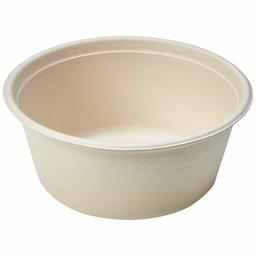

250-count pack of compostable 45-ounce bowls; ideal for delis, markets, food trucks, sandwich shops, and catered events; Made of biodegradable fiber materials; BPI-certified; lightweight yet sturdy; flat base with tall sides; Suitable for hot and cold foods; microwaveable and freezer-safe; Kraft brown color for rustic charm and to help indicate that it's compostable; Meets ASTM D6868 standards for compostability; meets FDA guidelines and Health Canada guidelines for food contact surfaces; on the USDA’s BioPreferred list; Each bowl measures 7.1 by 7.1 by 2.8 inches (LxWxH); backed by an AmazonBasics 1-year limited warranty


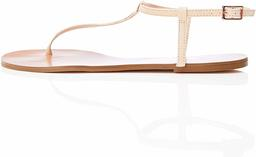

nan


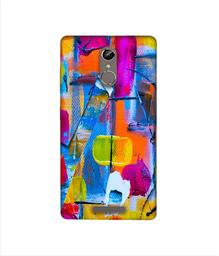

3D Printed Hard Back Case Mobile Cover for Gionee S6s; Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.; Stylish design and appearance, express your unique personality.; Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.; Slim Hard Back Cover; No Warranty


In [17]:
sample_data = listings_and_images.sample(5)

for index, row in sample_data.iterrows():
    image = Image.open(RAW_IMAGE_FILE_DIR / row["path"])
    display(image)
    print(row["bullet_point"])

    



In [20]:
listings_and_images.to_csv(PROCESSED_DATA_DIR / "marketplace_data.csv", index=False)